In [21]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import hvplot.pandas
import json
import holoviews as hv
from pathlib import Path
import datetime as dt
#from scipy.stats import linregress

# Impor the OpenWeatherMap API key
#from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

# Import API key
from api_keys import geoapify_key

In [22]:
# File to Load (Remember to Change These)
uber_load = Path("Resourses/uber.csv")

# Load the CSV file created in Part 1 into a Pandas DataFrame
uber_df = pd.read_csv(uber_load)

# Display sample data
uber_df.head()


,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [23]:
# Define the New York limits
lat_min = 40.477
lat_max = 45.015
lon_min = -79.7626
lon_max = -71.1851

# Create a new critearia according to New York Limits
pickup_lat = (uber_df['pickup_latitude'] >= lat_min) & (uber_df['pickup_latitude'] <= lat_max)
pickup_lon = (uber_df['pickup_longitude'] >= lon_min) & (uber_df['pickup_longitude'] <= lon_max)
dropoff_lat = (uber_df['dropoff_latitude'] >= lat_min) & (uber_df['dropoff_latitude'] <= lat_max)
dropoff_lon = (uber_df['dropoff_longitude'] >= lon_min) & (uber_df['dropoff_longitude'] <= lon_max)


uber_new = uber_df.loc[pickup_lat & pickup_lon & dropoff_lat & dropoff_lon]

# Drop any rows with null values
uber_new.dropna(how='any')

print(len(uber_new))
print(uber_new.head())

195795
   Unnamed: 0                            key  fare_amount  \
0    24238194    2015-05-07 19:52:06.0000003          7.5   
1    27835199    2009-07-17 20:04:56.0000002          7.7   
2    44984355   2009-08-24 21:45:00.00000061         12.9   
3    25894730    2009-06-26 08:22:21.0000001          5.3   
4    17610152  2014-08-28 17:47:00.000000188         16.0   

           pickup_datetime  pickup_longitude  pickup_latitude  \
0  2015-05-07 19:52:06 UTC        -73.999817        40.738354   
1  2009-07-17 20:04:56 UTC        -73.994355        40.728225   
2  2009-08-24 21:45:00 UTC        -74.005043        40.740770   
3  2009-06-26 08:22:21 UTC        -73.976124        40.790844   
4  2014-08-28 17:47:00 UTC        -73.925023        40.744085   

   dropoff_longitude  dropoff_latitude  passenger_count  
0         -73.999512         40.723217                1  
1         -73.994710         40.750325                1  
2         -73.962565         40.772647                1  
3  

In [24]:
# Create a new DataFrame call uber_new_df 
uber_filtered = uber_new.copy()

print(len(uber_filtered))
uber_filtered.head()


195795


,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [25]:
# Convert pickup_datatime to datatime format

uber_filtered['pickup_datetime'] = pd.to_datetime(uber_filtered['pickup_datetime'], utc=True).dt.floor('H')

uber_filtered.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:00:00+00:00,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:00:00+00:00,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:00:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:00:00+00:00,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:00:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5


In [26]:
#Change the date format '%Y-%m-%d %H:%M:%S +0000 UTC'
uber_filtered['pickup_datetime'] = pd.to_datetime(uber_filtered['pickup_datetime']).dt.strftime('%Y-%m-%d %H:%M:%S +0000 UTC')

uber_filtered.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:00:00 +0000 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:00:00 +0000 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:00:00 +0000 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:00:00 +0000 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:00:00 +0000 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [27]:
# File to Load 
openweather_load = Path("Resourses/openweather_2009_2015.csv")

# Load the CSV file created in Part 1 into a Pandas DataFrame
openweather_data=pd.read_csv(openweather_load)



print(len(openweather_data))
openweather_data.head()


60971


,dt,dt_iso,timezone,city_name,lat,lon,temp,visibility,dew_point,feels_like,...,wind_gust,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,1230768000,2009-01-01 00:00:00 +0000 UTC,-18000,New York,40.712775,-74.005973,-5.79,10000.0,-15.01,-12.79,...,19.0,NaN,NaN,NaN,NaN,20,801,Clouds,few clouds,02n
1,1230771600,2009-01-01 01:00:00 +0000 UTC,-18000,New York,40.712775,-74.005973,-6.74,10000.0,-15.65,-13.74,...,17.0,NaN,NaN,NaN,NaN,20,801,Clouds,few clouds,02n
2,1230775200,2009-01-01 02:00:00 +0000 UTC,-18000,New York,40.712775,-74.005973,-6.74,10000.0,-15.65,-13.74,...,17.5,NaN,NaN,NaN,NaN,75,803,Clouds,broken clouds,04n
3,1230778800,2009-01-01 03:00:00 +0000 UTC,-18000,New York,40.712775,-74.005973,-6.74,10000.0,-14.95,-13.74,...,14.4,NaN,NaN,NaN,NaN,0,800,Clear,sky is clear,01n
4,1230782400,2009-01-01 04:00:00 +0000 UTC,-18000,New York,40.712775,-74.005973,-7.72,10000.0,-15.01,-14.72,...,16.5,NaN,NaN,NaN,NaN,0,800,Clear,sky is clear,01n


In [28]:
# Combine the data into a single dataset.  
data_complete=pd.merge(uber_filtered,openweather_data, how = "left", left_on="pickup_datetime", right_on="dt_iso")

print(len(data_complete))
data_complete.head()


209683


,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dt,...,wind_gust,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:00:00 +0000 UTC,-73.999817,40.738354,-73.999512,40.723217,1,1431025200,...,NaN,NaN,NaN,NaN,NaN,0,800,Clear,sky is clear,01d
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:00:00 +0000 UTC,-73.994355,40.728225,-73.994710,40.750325,1,1247860800,...,NaN,NaN,NaN,NaN,NaN,0,500,Rain,light rain,10d
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:00:00 +0000 UTC,-74.005043,40.740770,-73.962565,40.772647,1,1251147600,...,NaN,NaN,NaN,NaN,NaN,20,801,Clouds,few clouds,02d
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:00:00 +0000 UTC,-73.976124,40.790844,-73.965316,40.803349,3,1246003200,...,NaN,NaN,NaN,NaN,NaN,20,801,Clouds,few clouds,02n
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:00:00 +0000 UTC,-73.925023,40.744085,-73.973082,40.761247,5,1409245200,...,11.3,NaN,NaN,NaN,NaN,0,800,Clear,sky is clear,01d


In [29]:
# Data without duplicates
data_without_duplicates = data_complete.drop_duplicates(['Unnamed: 0'])
print(len(data_without_duplicates))
data_without_duplicates.head()

195795


,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dt,...,wind_gust,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:00:00 +0000 UTC,-73.999817,40.738354,-73.999512,40.723217,1,1431025200,...,NaN,NaN,NaN,NaN,NaN,0,800,Clear,sky is clear,01d
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:00:00 +0000 UTC,-73.994355,40.728225,-73.994710,40.750325,1,1247860800,...,NaN,NaN,NaN,NaN,NaN,0,500,Rain,light rain,10d
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:00:00 +0000 UTC,-74.005043,40.740770,-73.962565,40.772647,1,1251147600,...,NaN,NaN,NaN,NaN,NaN,20,801,Clouds,few clouds,02d
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:00:00 +0000 UTC,-73.976124,40.790844,-73.965316,40.803349,3,1246003200,...,NaN,NaN,NaN,NaN,NaN,20,801,Clouds,few clouds,02n
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:00:00 +0000 UTC,-73.925023,40.744085,-73.973082,40.761247,5,1409245200,...,11.3,NaN,NaN,NaN,NaN,0,800,Clear,sky is clear,01d


In [30]:
# Check each column exist before deleting them
columns_to_drop = ["key","dt","lat","lon","dt_iso","timezone","sea_level","grnd_level", "wind_gust", "rain_1h", "rain_3h", "snow_1h", "snow_3h","clouds_all","weather_id"]
columns_to_drop = [col for col in columns_to_drop if col in data_without_duplicates.columns]

# Delete the columns
data_without_duplicates = data_without_duplicates.drop(columns_to_drop, axis=1)

# Display sample data
data_without_duplicates.head()

,Unnamed: 0,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,city_name,temp,...,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,weather_main,weather_description,weather_icon
0,24238194,7.5,2015-05-07 19:00:00 +0000 UTC,-73.999817,40.738354,-73.999512,40.723217,1,New York,25.73,...,25.06,22.79,25.84,1023,27,6.2,190,Clear,sky is clear,01d
1,27835199,7.7,2009-07-17 20:00:00 +0000 UTC,-73.994355,40.728225,-73.994710,40.750325,1,New York,26.35,...,26.35,26.24,28.29,1009,64,4.1,170,Rain,light rain,10d
2,44984355,12.9,2009-08-24 21:00:00 +0000 UTC,-74.005043,40.740770,-73.962565,40.772647,1,New York,27.13,...,27.74,26.98,29.38,1018,53,5.1,290,Clouds,few clouds,02d
3,25894730,5.3,2009-06-26 08:00:00 +0000 UTC,-73.976124,40.790844,-73.965316,40.803349,3,New York,21.05,...,21.53,20.58,21.24,1007,89,2.6,170,Clouds,few clouds,02n
4,17610152,16.0,2014-08-28 17:00:00 +0000 UTC,-73.925023,40.744085,-73.973082,40.761247,5,New York,26.99,...,26.86,25.53,27.19,1013,40,6.2,330,Clear,sky is clear,01d


In [31]:
# Export the City_Data into a csv
data_without_duplicates.to_csv("output_data/data_complete.csv", index_label="Uber_ID")

In [ ]:
##Number of rides according to the weather? Ricardo

In [ ]:
##What hours of the day or in what weather are the peak requests? Lina

In [ ]:
##Which is the destination with the most rides?Kevin

In [ ]:
##Uber Fares depend on different times(day/night/day of week), duration(long/short)? Kevin

In [ ]:
##Which kind of city area(downtown, industry,financial central…) has the most uber request? Lina

In [ ]:
##Any relation between public transportation line and uber pickup and dropoff location? Kevin

# Is there price surge in relation to time of the day, rush hour or weather?

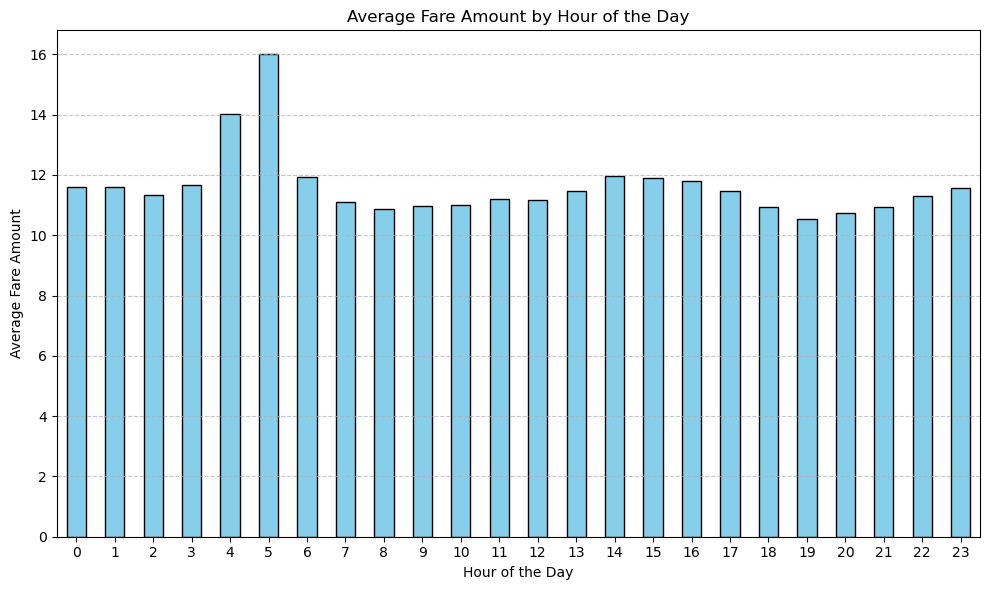

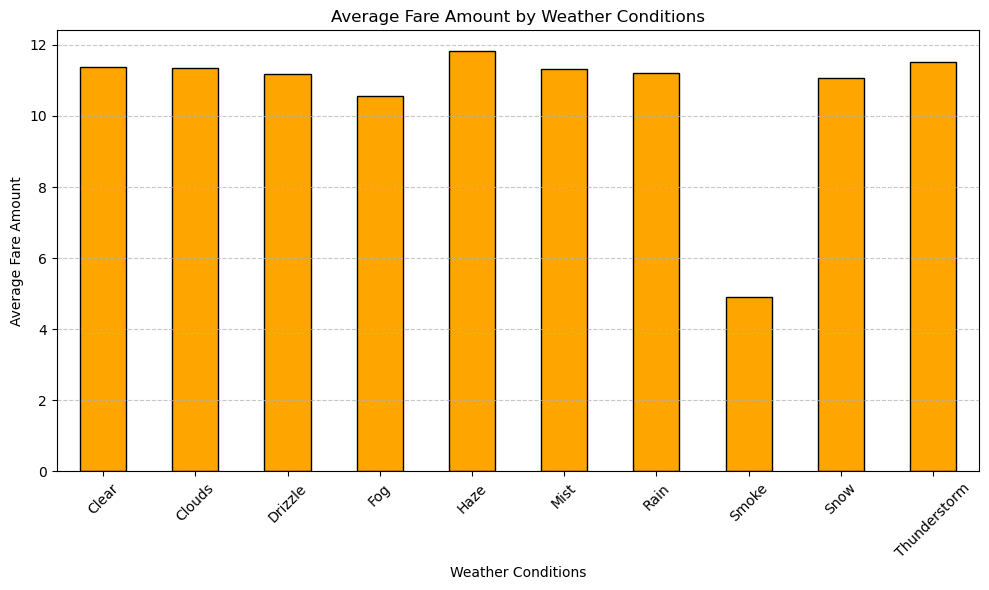

In [36]:
##Price surge? In relation to time of the day, rush hour or weather Zinny

# Convert pickup_datetime to datetime format with specified format
data_without_duplicates['pickup_datetime'] = pd.to_datetime(data_without_duplicates['pickup_datetime'], format='%Y-%m-%d %H:%M:%S %z UTC')

# Extract Time Features
data_without_duplicates['hour_of_day'] = data_without_duplicates['pickup_datetime'].dt.hour
data_without_duplicates['day_of_week'] = data_without_duplicates['pickup_datetime'].dt.dayofweek

# Group the Data and Calculate Relevant Statistics
# Group by hour of the day and calculate the average fare amount for each hour
fare_by_hour = data_without_duplicates.groupby('hour_of_day')['fare_amount'].mean()

# Group by rush hour indicator and calculate the average fare amount
# Group by weather conditions and calculate the average fare amount for each weather condition
fare_by_weather = data_without_duplicates.groupby('weather_main')['fare_amount'].mean()

# Visualize the Results
# Plot average fare amount by hour of the day
plt.figure(figsize=(10, 6))
fare_by_hour.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Fare Amount')
plt.title('Average Fare Amount by Hour of the Day')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot average fare amount by weather conditions
plt.figure(figsize=(10, 6))
fare_by_weather.plot(kind='bar', color='orange', edgecolor='black')
plt.xlabel('Weather Conditions')
plt.ylabel('Average Fare Amount')
plt.title('Average Fare Amount by Weather Conditions')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
##Distribution of the rides by weekdays? Ricardo

 # Do people avoid rides on sunny days ?

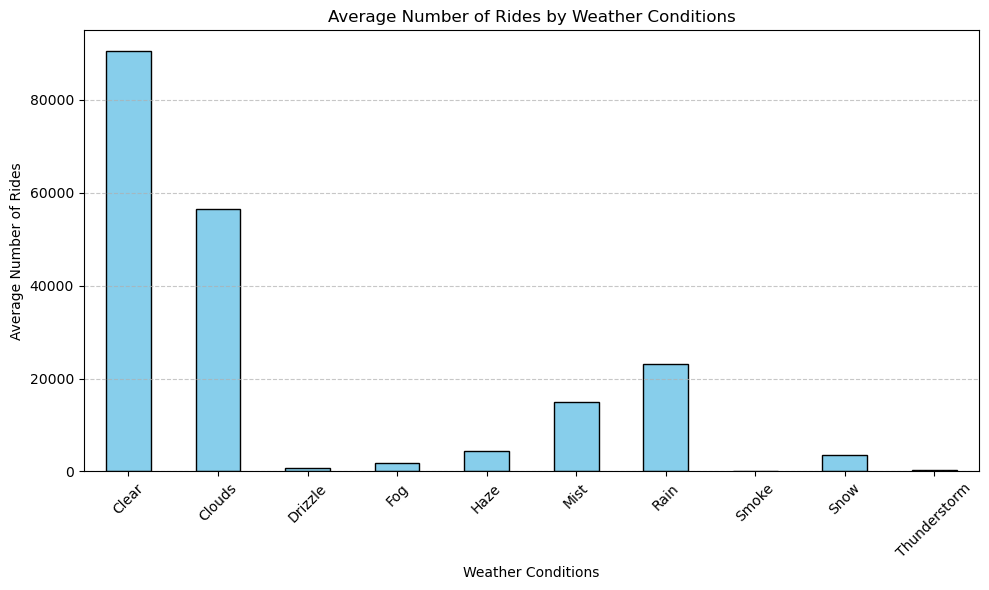

In [33]:
#Do people avoid rides on sunny days? Zinny

#Group the Data by Weather Conditions and Calculate Average Rides
rides_by_weather = data_without_duplicates.groupby('weather_main')['pickup_datetime'].count()

#Visualize the Results
plt.figure(figsize=(10, 6))
rides_by_weather.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Weather Conditions')
plt.ylabel('Average Number of Rides')
plt.title('Average Number of Rides by Weather Conditions')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
##What are the earnings of Uber drivers based on factors such as time of day, location, or type of vehicle used?Lina